# Minimum Knight Moves

In an infinite chess board with coordinates from -infinity to +infinity, you have a knight at square [0, 0].

A knight has 8 possible moves it can make, as illustrated below. Each move is two squares in a cardinal direction, then one square in an orthogonal direction.

Return the minimum number of steps needed to move the knight to the square [x, y]. It is guaranteed the answer exists.

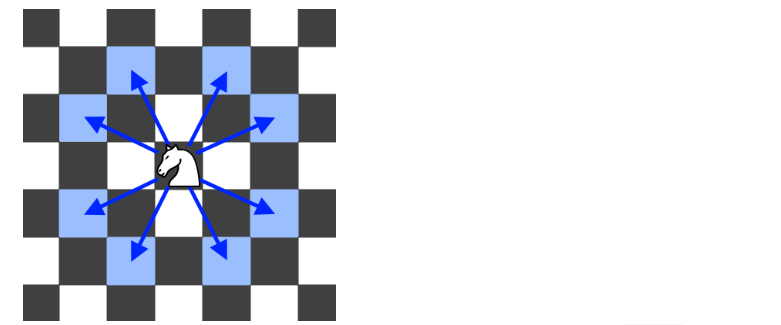

Example 1:
```
Input: x = 2, y = 1
Output: 1
Explanation: [0, 0] → [2, 1]
```

Example 2:
```
Input: x = 5, y = 5
Output: 4
Explanation: [0, 0] → [2, 1] → [4, 2] → [3, 4] → [5, 5]
```

Constraints:
```
-300 <= x, y <= 300
0 <= |x| + |y| <= 300
```

# Solution 1: Math

In [1]:
class Solution:
    # Time O(1)
    # Space O(1)
    def minKnightMoves(self, x: int, y: int) -> int:
        x = abs(x)
        y = abs(y)
        # x always >= y
        x, y = max(x, y), min(x, y)
        if x == 1 and y == 0:
            return 3
        if x == 2 and y == 2:
            return 4
        delta = x - y
        if y > delta:
            return delta - 2 * ((delta - y) // 3)
        else:
            return delta - 2 * ((delta - y) // 4)

In [2]:
x = 2
y = 1
expected = 1

output = Solution().minKnightMoves(x, y)
print(output)
assert output == expected

1


In [3]:
x = 5
y = 5
expected = 4

output = Solution().minKnightMoves(x, y)
print(output)
assert output == expected

4


# DFS + Dynamic Programming

In [4]:
from functools import lru_cache

class Solution:
    # time = O(abs(x*y))
    # space = O(abs(x*y))
    def minKnightMoves(self, x: int, y: int) -> int:
        # decreases space by half (limit only haft that x > y)
        x, y = max(x, y), min(x, y)

        @lru_cache(maxsize=None)
        def dfs(x, y):
            if x + y == 0:
                # base case: (0, 0)
                return 0
            elif x + y == 2:
                # base case: (1, 1), (0, 2), (2, 0)
                return 2
            else:
                return min(dfs(abs(x - 1), abs(y - 2)), dfs(abs(x - 2), abs(y - 1))) + 1

        return dfs(abs(x), abs(y))

In [5]:
x = 2
y = 1
expected = 1

output = Solution().minKnightMoves(x, y)
print(output)
assert output == expected

1


In [6]:
x = 5
y = 5
expected = 4

output = Solution().minKnightMoves(x, y)
print(output)
assert output == expected

4
